# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} + \frac{2\alpha}{n}\sum_{i=1}^{n}(y_{i} - \langle x_{i},w_{old} \rangle)x_{i} - \frac{2\alpha}{C}w_{old} $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ 0) x = (f_1, f_2, ..., f_D) $$

$$1) \nabla_w\langle x,w \rangle = grad (\langle x,w \rangle) = (\frac{\delta (f_1w_1)}{\delta w_1},\frac{\delta (f_2w_2)}{\delta w_2},...,\frac{\delta (f_Dw_D)}{\delta w_D}) = (f_1,f_2,...,f_D) = x $$


$$ 2) \nabla\sum_{i=1}^{n}f_i = \sum_{i=1}^{n}\nabla f_i$$

$$ 3) \nabla_w L(X,w)= \nabla_w(\frac{1}{n}\left[\sum_{i=1}^{n} (y_i - \langle\,x_i,w\rangle) ^ 2 \right] + \frac{1}{C}R(w))$$

$$ 4) R(w) =  \sum_{j=1}^{D}w_j^2 $$

$$ 5) \nabla_w L(X,w) =  - \frac{2}{n}\sum_{i=1}^{n}(y_{i} - \langle x_{i},w \rangle)x_{i} + \frac{2}{C} w $$
$$ 6)  w_{new} = w_{old} + \frac{2\alpha}{n}\sum_{i=1}^{n}(y_{i} - \langle x_{i},w_{old} \rangle)x_{i} - \frac{2\alpha}{C}w_{old} $$

Если попытаться интуитивно описать формулу градиента, то он похож на среднюю ошибку алгоритма на мини-батче.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} +\frac{\alpha}{n}\sum_{i = 1}^{n}(y_{i} - \sigma(\langle w_{old},x_{i} \rangle))x_i - \frac{2\alpha}{C}w_{old} $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ 0) x = (f_1, f_2, ..., f_D) $$

$$1) \nabla_w\langle x,w \rangle = grad (\langle x,w \rangle) = (\frac{\delta (f_1w_1)}{\delta w_1},\frac{\delta (f_2w_2)}{\delta w_2},...,\frac{\delta (f_Dw_D)}{\delta w_D}) = (f_1,f_2,...,f_D) = x $$

$$3) \nabla\sum_{i=1}^{n}f_i = \sum_{i=1}^{n}\nabla f_i$$

$$4) \nabla_w\sigma(w,x) = \frac{e^{-x}}{(1+e^{-x})^2} = (1-\sigma(x,w))\sigma(x,w)$$

$$5) R(w) =  \sum_{j=1}^{D}w_j^2 $$

$$6) \nabla_w L(X,w) = \nabla_w(-\frac{1}{n}\sum_{i = 1}^{n}(y_ilog(\sigma(\langle x_i,w \rangle))+(1-y_i)log(1-\sigma(\langle x_i,w \rangle)) + \frac{1}{C}R(w)) = -\frac{1}{n}\sum_{i = 1}^{n}(y_i(1-\sigma(\langle w,x_i \rangle))x_i - (1-y_i)\sigma(\langle x_i,w \rangle)x_i)  + \frac{2}{C} w=$$  

$$ = -\frac{1}{n}\sum_{i = 1}^{n}(y_i - \sigma(\langle w,x_i \rangle))x_i  + \frac{2}{C} w$$
$$w_{new} = w_{old} + \frac{\alpha}{n}\sum_{i = 1}^{n}(y_{i} - \sigma(\langle w_{old},x_{i} \rangle))x_i - \frac{2\alpha}{C}w_{old}$$

Аналогично, если попытаться интуитивно описать формулу градиента, то он похож на среднюю ошибку алгоритма на мини-батче. Градиенты линейной и логистической регрессии похожи)

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Первая производная: $$ \nabla_w Q(X,w) = \nabla_w ((\langle X, w \rangle - y)^T(\langle X, w \rangle - y)) = (2X^TXw - 2X^Ty)$$

Вторая производная: $$ \nabla_w^2 Q(X,w) = (2X^TX)^T = 2X^TX $$

Рассмотрим матрицу $ X^TX $

Это матрица Грама для линейно независимых векторов $ x_1, x_2.. x_n, где     x_i{}_j = (x_i{}_1, x_i{}_2,...x_i{}_m) $

Тогда эта матрица положительно определенная по критерию.
Тогда $ X^TX > 0 $

Следовательно вторая производная больше нуля, следовательно $w = (X^TX)^{-1}X^TY $ точка минимума

Точное решение для модели с $L2$ регуляризацией:
$$ Q_r(w) = (\langle X, w \rangle - y)^T(\langle X, w \rangle - y) + \alpha w^Tw$$

$$ \nabla_w Q_r(w) = 2X^TXw - 2X^Ty + \alpha (I^T + I)w = (2X^TX + 2\alpha I)w - 2X^Ty = 0  $$

$$ w = (X^TX + \alpha I)^{-1}(X^Ty) $$

Если X состоит из линейно зависимых векторов, то $ X^TX $ тоже и следовательно определитель $ X^TX $ равен нулю, поэтому у $ X^TX $ не существует обратной матрицы. Если же к $ X^TX $ прибавить $\alpha I (\alpha != 0) $ то определитель матрицы перестанет быть равным нулю, и следовательно обратная матрица будет существовать, поэтому будет существовать и точное решение. 

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$1) E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$

$$ 2) \frac{\delta E(L | x_i)}{\delta a(x_i)} = - \frac {p(y_i = 1 |x_i)}{a(x_i)} + \frac {p(y_i = 0 |x_i)}{1-a(x_i)} = $$

$$ = \frac{ -p(y_i = 1 |x_i) + p(y_i = 1 |x_i)a(x_i) + p(y_i = 0 |x_i)a(x_i)}{a(x_i)(1-a(x_i))} = \frac{ -p(y_i = 1 |x_i) + a(x_i) (p(y_i = 0 |x_i) + p(y_i = 1 |x_i)) }{a(x_i)(1-a(x_i))} = $$

$$ = \frac{ -p(y_i = 1 |x_i) + a(x_i)}{a(x_i)(1-a(x_i))} = 0$$

$$ 3) Получаем: a(x_i) = p(y_i = 1|x_i) - Экстремум $$


Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
$ w_0 $ - bias (смещение) отвечает за двиг нашего линейного пространства, описываемого векторами $ w_1, w_2, ... w_D $, относительно начала координат. Bias нужен для того, чтобы наша модель настраивалась на целевую зависимость, поэтому да, в L1/L2 регуляризации нужно использовать $ w_0 $.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [2]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [3]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [11]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    indices = np.arange(X.shape[0])
    if shuffle is True:
        np.random.shuffle(indices)
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[indices[i: min(i + batch_size, X.shape[0])]]
        y_batch = y[indices[i: min(i + batch_size, X.shape[0])]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [9]:
!pip install pycodestyle flake8 pycodestyle_magic

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
%load_ext pycodestyle_magic

In [82]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1, threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold = threshold

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        if self.model_type == 'lin_reg':
            a = X_batch.dot(self.weights)
            loss = (y_batch - a) ** 2
            loss = loss.sum()
            loss /= X_batch.shape[0]
            reg = np.sum(self.weights ** 2)
            reg /= self.C
            loss += reg
        elif self.model_type == 'log_reg':
            sigm = X_batch.dot(self.weights)
            a = sigmoid(sigm)
            loss = y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)
            loss = -loss.sum()
            loss /= X_batch.shape[0]
            reg = np.sum(self.weights ** 2)
            reg /= self.C
            loss += reg
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        if self.model_type == 'lin_reg':
            a = X_batch.dot(self.weights)
            s = y_batch - a
            s = -2 * s.dot(X_batch)
            s /= X_batch.shape[0]
            reg = 2 * self.weights / self.C
            loss_grad = s + reg
        elif self.model_type == 'log_reg':
            sigm = X_batch.dot(self.weights)
            a = sigmoid(sigm)
            s = y_batch - a
            s = - s.dot(X_batch)
            s /= X_batch.shape[0]
            reg = 2 * self.weights / self.C
            loss_grad = s + reg
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights -= self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        X_train = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.weights = np.random.uniform(-1, 1, X_train.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_train, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        X_test = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        if self.model_type == 'lin_reg':
            y_hat = (X_test.dot(self.weights) > 0).astype(int)
        elif self.model_type == 'log_reg':
            y_hat = (sigmoid(X_test.dot(self.weights)) > self.threshold).astype(int)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [92]:
def plot_decision_boundary(clf, label=None):
    weights = clf.weights
    x = np.linspace(-7, 10, num=2)
    plt.plot(x, -(weights[0] + x * weights[1]) / weights[2], label=label)

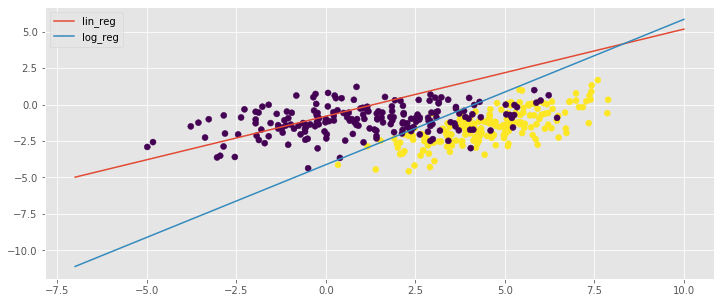

In [151]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf_lin = MySGDClassifier(batch_generator, C=1000)
clf_lin.fit(X, y)
plot_decision_boundary(clf_lin, label='lin_reg')

clf_log = MySGDClassifier(batch_generator, C=1250, max_epoch=20, model_type='log_reg')
clf_log.fit(X, y)
plot_decision_boundary(clf_log, label='log_reg')

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [103]:
from sklearn.datasets import make_classification

In [104]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

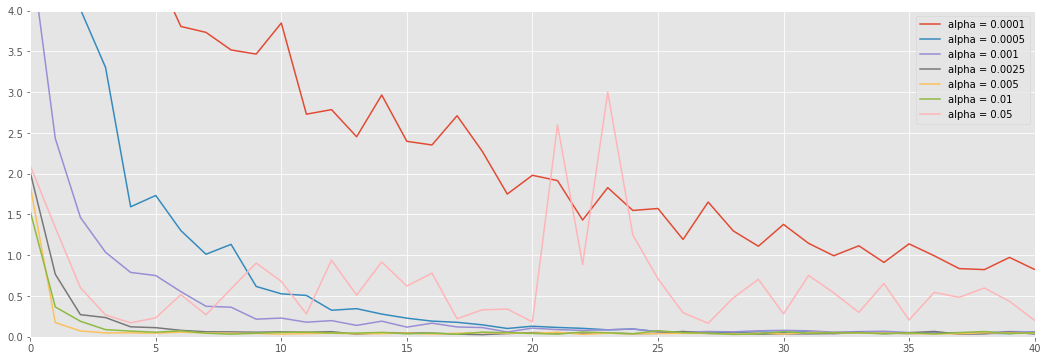

In [133]:
fig = plt.figure(figsize=(18, 6))
plt.xlim(0, 40)
plt.ylim(0, 4)
alpha = (0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.05)
N = 100
for i in alpha:
    clf = MySGDClassifier(batch_generator, C=1000, alpha=i, model_type='lin_reg')
    clf.fit(X, y)
    loss = []
    for l in range(0, len(clf.errors_log['loss']), N):
        loss.append(np.sum(clf.errors_log['loss'][l: l + N]) / N)
    plt.plot(np.arange(len(loss)), loss, label="alpha = " + str(i))
plt.legend()

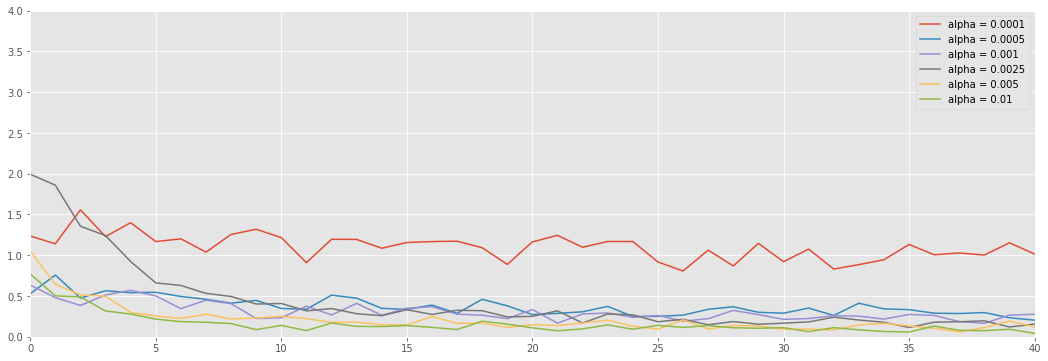

In [134]:
fig = plt.figure(figsize=(18, 6))
plt.xlim(0, 40)
plt.ylim(0, 4)
alpha = (0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.01)
N = 100
for i in alpha:
    clf = MySGDClassifier(batch_generator, C=1000, alpha=i, model_type='log_reg')
    clf.fit(X, y)
    loss = []
    for l in range(0, len(clf.errors_log['loss']), N):
        loss.append(np.sum(clf.errors_log['loss'][l: l + N]) / N)
    plt.plot(np.arange(len(loss)), loss, label="alpha = " + str(i))
plt.legend()

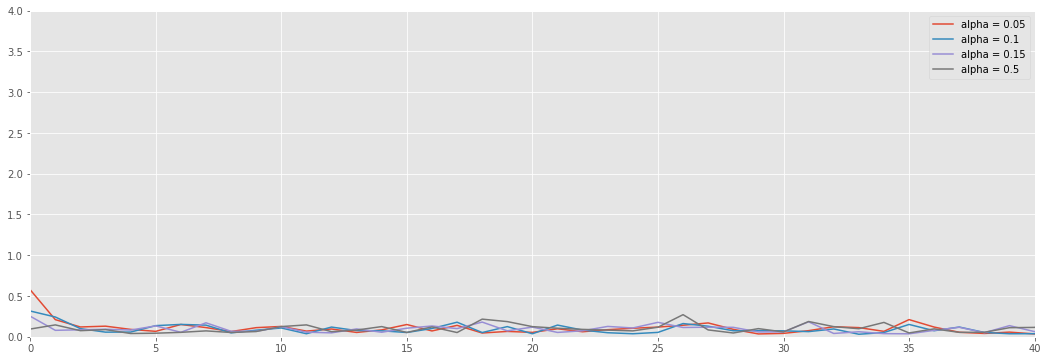

In [135]:
fig = plt.figure(figsize=(18, 6))
plt.xlim(0, 40)
plt.ylim(0, 4)
alpha = (0.05, 0.1, 0.15, 0.5)
N = 100
for i in alpha:
    clf = MySGDClassifier(batch_generator, C=1000, alpha=i, model_type='log_reg')
    clf.fit(X, y)
    loss = []
    for l in range(0, len(clf.errors_log['loss']), N):
        loss.append(np.sum(clf.errors_log['loss'][l: l + N]) / N)
    plt.plot(np.arange(len(loss)), loss, label="alpha = " + str(i))
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Лучшая сходимость достигается при alpha от 0.001 до 0.01. При больших значениях, график loss'а может расти, что говорит, о том, что при градиентном спуске из-за большого значения alpha (шаг спуска) точка минимума "перескакивается". 

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in square
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in true_divide


(0, 150)

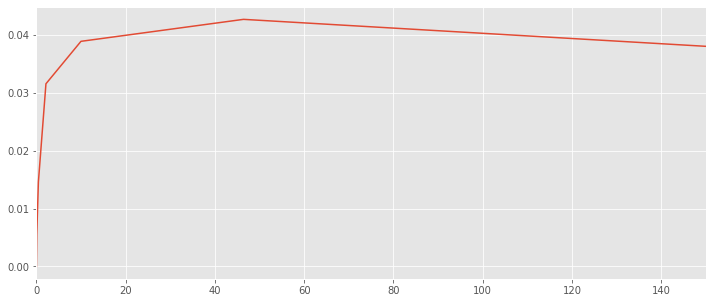

In [148]:
C = np.logspace(3, -3, 10)
weights = []
for reg in C:
    clf = MySGDClassifier(batch_generator, C=reg, alpha=0.01, model_type='lin_reg', max_epoch=2)
    clf.fit(X, y)
    weights.append(clf.weights.mean())
plt.plot(C, weights)
plt.xlim(0, 150)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in multiply
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in square
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in true_divide


(0, 100)

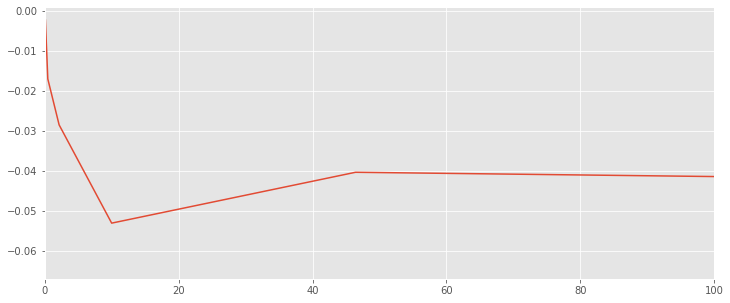

In [146]:
C = np.logspace(3, -3, 10)
weights = []
for reg in C:
    clf = MySGDClassifier(batch_generator, C=reg, alpha=0.01, model_type='log_reg', max_epoch=2)
    clf.fit(X, y)
    weights.append(clf.weights.mean())
plt.plot(C, weights)
plt.xlim(0, 100)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [762]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [763]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [764]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [765]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [766]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [767]:
test_data
pair_ids = test_data['pair_id'].tolist()
pair_ids

[11691,
 11692,
 11693,
 11694,
 11695,
 11696,
 11697,
 11698,
 11699,
 11700,
 11701,
 11702,
 11703,
 11704,
 11705,
 11706,
 11707,
 11708,
 11709,
 11710,
 11711,
 11712,
 11713,
 11714,
 11715,
 11716,
 11717,
 11718,
 11719,
 11720,
 11721,
 11722,
 11723,
 11724,
 11725,
 11726,
 11727,
 11728,
 11729,
 11730,
 11731,
 11732,
 11733,
 11734,
 11735,
 11736,
 11737,
 11738,
 11739,
 11740,
 11741,
 11742,
 11743,
 11744,
 11745,
 11746,
 11747,
 11748,
 11749,
 11750,
 11751,
 11752,
 11753,
 11754,
 11755,
 11756,
 11757,
 11758,
 11759,
 11760,
 11761,
 11762,
 11763,
 11764,
 11765,
 11766,
 11767,
 11768,
 11769,
 11770,
 11771,
 11772,
 11773,
 11774,
 11775,
 11776,
 11777,
 11778,
 11779,
 11780,
 11781,
 11782,
 11783,
 11784,
 11785,
 11786,
 11787,
 11788,
 11789,
 11790,
 11791,
 11792,
 11793,
 11794,
 11795,
 11796,
 11797,
 11798,
 11799,
 11800,
 11801,
 11802,
 11803,
 11804,
 11805,
 11806,
 11807,
 11808,
 11809,
 11810,
 11811,
 11812,
 11813,
 11814,
 11815,


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [768]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import json
from scipy.stats import shapiro
import scipy.stats as ss
from sklearn.model_selection import StratifiedKFold

In [769]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Подбор параметров для линейной регрессии

Выбор размера батча

In [805]:
np.random.seed(0)
batches = (1, 5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000)
scores = []
for batch_size in batches:
    model = MySGDClassifier(batch_generator, C=1000, alpha=0.01, model_type='lin_reg',
                            max_epoch=2, batch_size=batch_size)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [806]:
scores

[0.4444045621417091,
 0.4669265999247231,
 0.4838125050473182,
 0.4590764570244795,
 0.45139167689492304,
 0.45577464087398223,
 0.4613422491018085,
 0.4479900335297238,
 0.4135716529471831,
 0.43966136935872174,
 0.46342794603083093]

In [807]:
batch_size_lin = batches[np.argmax(scores)]
batch_size_lin

10

Подбор коэффициента для регуляризации

In [808]:
np.random.seed(0)
Сoefficients = (1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 7500, 10000, 12500, 15000)
scores = []
for C in Сoefficients:
    model = MySGDClassifier(batch_generator, C=C, alpha=0.01, model_type='lin_reg',
                            max_epoch=2, batch_size=batch_size_lin)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [809]:
scores

[0.5041959841157764,
 0.473584195762178,
 0.4850279872848864,
 0.4544279059141229,
 0.456170312585371,
 0.479999718674491,
 0.45355828397060316,
 0.44759495584501935,
 0.4676694781294081,
 0.46865051343917286,
 0.47430250176405264,
 0.471857741039455,
 0.4752747942305377,
 0.4779188541763352,
 0.43449803702301726]

In [810]:
C_lin = Сoefficients[np.argmax(scores)]
C_lin

1

Подбор коэффициента для шага градиентного спуска

In [776]:
np.random.seed(0)
alphas = (0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.05)
scores = []
for alpha in alphas:
    model = MySGDClassifier(batch_generator, C=C_lin, alpha=alpha, model_type='lin_reg',
                            max_epoch=2, batch_size=batch_size_lin)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [777]:
scores

[0.4887367538046526,
 0.5041038399581206,
 0.5037625348352992,
 0.5021921300207028,
 0.4997350771986544,
 0.5224077860859528,
 0.3833328316671866]

In [778]:
alpha_lin = alphas[np.argmax(scores)]
alpha_lin

0.01

Подбор количества эпох для обучения

In [779]:
np.random.seed(0)
epochs = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25)
scores = []
for epoch in epochs:
    model = MySGDClassifier(batch_generator, C=C_lin, alpha=alpha_lin, model_type='lin_reg',
                            max_epoch=epoch, batch_size=batch_size_lin)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [780]:
scores

[0.5036859197540687,
 0.4744725052042318,
 0.5282304574185416,
 0.5140820158479545,
 0.47419611967617203,
 0.4814301116525771,
 0.5038644006199348,
 0.4924153270296966,
 0.5205155944727113,
 0.5334029801928344,
 0.5168067296362203,
 0.5428749719039312,
 0.4850654198839264]

In [781]:
max_epoch_lin = epochs[np.argmax(scores)]
max_epoch_lin

20

# Подбор параметров для логистической регрессии

Выбор размера батча

In [782]:
np.random.seed(0)
batches = (1, 5, 10, 20, 50, 60, 100, 200, 500, 1000, 5000, 10000)
scores = []
for batch_size in batches:
    model = MySGDClassifier(batch_generator, C=1000, alpha=0.01, model_type='log_reg',
                            max_epoch=2, batch_size=batch_size)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [783]:
scores

[0.5321964513908876,
 0.5108365357665964,
 0.532929524673617,
 0.5521239952014498,
 0.5813907673824794,
 0.5756735917610178,
 0.5632778994331826,
 0.5231240267102534,
 0.3647215853543464,
 0.4867972913469173,
 0.47996198302856535,
 0.4063600305298042]

In [784]:
batch_size_log = batches[np.argmax(scores)]
batch_size_log

50

Подбор коэффициента для регуляризации

In [785]:
np.random.seed(0)
Сoefficients = (5, 10, 25, 50, 75, 100, 200, 500, 1000, 2000, 5000, 6000, 7500, 9000, 10000, 12500, 15000)
scores = []
for C in Сoefficients:
    model = MySGDClassifier(batch_generator, C=C, alpha=0.01, model_type='log_reg',
                            max_epoch=2, batch_size=batch_size_log)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [786]:
scores

[0.6024775163149834,
 0.5893690353743303,
 0.5860289092716597,
 0.5720124034714816,
 0.5822957103346558,
 0.5803795068940085,
 0.5856380023134147,
 0.5468728058783161,
 0.5728246673375692,
 0.59152528053332,
 0.5814910438621558,
 0.5850463298416472,
 0.5835025834761753,
 0.5665535827028324,
 0.5692674130707236,
 0.5985240163124408,
 0.5617145329319804]

In [787]:
C_log = Сoefficients[np.argmax(scores)]
C_log

5

Подбор коэффициента для шага градиентного спуска

In [788]:
np.random.seed(0)
alphas = (0.0001, 0.0005, 0.001, 0.0025, 0.003, 0.004, 0.0045, 0.005, 0.006, 0.007, 0.01, 0.05, 0.1)
scores = []
for alpha in alphas:
    model = MySGDClassifier(batch_generator, C=C_log, alpha=alpha, model_type='log_reg',
                            max_epoch=2, batch_size=batch_size_log)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [789]:
scores

[0.46060564218214745,
 0.2501770967939961,
 0.5478248241993703,
 0.5656812880923087,
 0.5898342261780499,
 0.5930093396201845,
 0.5909472946246849,
 0.5889086347042396,
 0.6042810324487948,
 0.6071768769959702,
 0.6041775074130805,
 0.6032482472929932,
 0.6089687464924439]

In [790]:
alpha_log = alphas[np.argmax(scores)]
alpha_log

0.1

Подбор количества эпох для обучения

In [791]:
np.random.seed(0)
epochs = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25)
scores = []
for epoch in epochs:
    model = MySGDClassifier(batch_generator, C=C_log, alpha=alpha_log, model_type='log_reg',
                            max_epoch=epoch, batch_size=batch_size_log)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [792]:
scores

[0.6017786005246142,
 0.5863764801326947,
 0.6050196194777943,
 0.48824816895830664,
 0.5833729678234822,
 0.5271535924372266,
 0.48762455979563113,
 0.4974753386956629,
 0.6063753954090672,
 0.6081676277884542,
 0.6076696264534907,
 0.6026073597040877,
 0.4739341144554978]

In [793]:
max_epoch_log = epochs[np.argmax(scores)]
max_epoch_log

10

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Выбор модели

In [794]:
np.random.seed(0)
lin = MySGDClassifier(batch_generator, C=C_lin, alpha=alpha_lin, model_type='lin_reg',
                      max_epoch=max_epoch_lin, batch_size=batch_size_lin)
score_lin = cross_val_score(lin, X_train, y_train, cv=5, scoring='f1').mean()
score_lin

0.48551095973644187

In [795]:
np.random.seed(0)
log = MySGDClassifier(batch_generator, C=C_log, alpha=alpha_log, model_type='log_reg',
                      max_epoch=max_epoch_log, batch_size=batch_size_log)
score_log = cross_val_score(log, X_train, y_train, cv=5, scoring='f1').mean()
score_log

0.6054813828250175

In [796]:
if (score_log > score_lin):
    model_type, C, alpha, max_epoch, batch_size = 'log_reg', C_log, alpha_log, max_epoch_log, batch_size_log
else:
    model_type, C, alpha, max_epoch, batch_size = 'lin_reg', C_lin, alpha_lin, max_epoch_lin, batch_size_lin

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [797]:
np.random.seed(0)
thresholds = (0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7)
scores = []
for threshold in thresholds:
    model = MySGDClassifier(batch_generator, C=C, alpha=alpha, model_type=model_type,
                            max_epoch=max_epoch, batch_size=batch_size, threshold=threshold)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())

In [798]:
scores

[0.4466148154441466,
 0.49085116801903705,
 0.5281946688490929,
 0.5769814265187042,
 0.6129493826123648,
 0.6160088548756696,
 0.6065926571359512,
 0.4538045323517019,
 0.5466399667663128,
 0.45225585388109824,
 0.37386724204499916]

In [799]:
threshold = thresholds[np.argmax(scores)]
threshold

0.45

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [800]:
model = MySGDClassifier(batch_generator, C=C, alpha=alpha, model_type=model_type,
                        max_epoch=max_epoch, batch_size=batch_size, threshold=threshold)
model.fit(X_train, y_train)
y_test = model.predict(X_test)
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [801]:
model = MySGDClassifier(batch_generator, C=C, alpha=alpha, model_type=model_type,
                        max_epoch=max_epoch, batch_size=batch_size, threshold=threshold)
score = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')

In [802]:
score

array([0.43543544, 0.64285714, 0.59766764, 0.6518724 , 0.65769806,
       0.6124031 , 0.53926702, 0.6143617 , 0.71214188, 0.66751918])

In [803]:
score.mean()

0.6131223555892233

In [804]:
with open("resultBest.csv", "w", encoding='utf-8') as outfile:
    outfile.write(str("pair_id,target\n"))
    for i in range(len(y_test)):
        outfile.write(str(pair_ids[i]) + str(",") + str(y_test[i]) + str("\n"))

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***